0.279304334763
0.8464912280701754


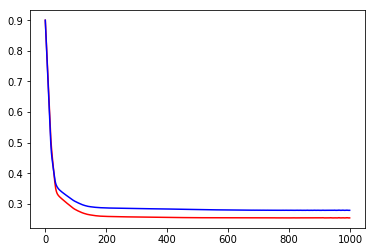

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split 
x,y = load_svmlight_file("F:/australian_scale.txt")
x=x.toarray()
m, n = np.shape(x)
a=np.ones(m)
X=np.column_stack((x,a))
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)
m_train,n_train= np.shape(X_train)
m_test,n_test= np.shape(X_test)
w = np.zeros(n+1)
W=w.transpose()
alpha = 0.03
maxIteration = 1000
Iteration=range(0,maxIteration)
Ltrain=[]
Lvalidation=[]
for i in range(0, maxIteration):
    ltrain=0
    ltest=0
    g=0
    count=0
    for j in range(m_train):
        y_predict1= np.dot(W.transpose(),X_train[j].transpose())
        y_predict11= np.dot(y_predict1,y_train[j])
        ltrain+=max(0,1-y_predict11)
    lltrain=(np.dot(W.transpose(),W)/2+0.9*ltrain)/m_train
    Ltrain.append(lltrain)
    for j in range(m_test):
        y_pre=np.dot(W.transpose(),X_test[j].transpose())
        if y_pre>=0 and y_test[j]>=0:
            count+=1
        if y_pre<0 and y_test[j]<0:
            count+=1
        y_predict2=np.dot(W.transpose(),X_test[j].transpose())
        y_predict22= np.dot(y_predict2,y_test[j])
        ltest+=max(0,1-y_predict22)
    accurancy=count/m_test
    lltest=(np.dot(W.transpose(),W)/2+0.9*ltest)/m_test
    Lvalidation.append(lltest)
    for j in range(m_train):
        y_predict111=np.dot(W.transpose(),X_train[j].transpose())
        if np.dot(y_train[j],y_predict111)<=1:
            g -= y_train[j]*X_train[j]
    gradient=(W+0.9*g)/m_train;
    W = W - alpha * gradient
plt.plot(Iteration,Ltrain,'r',label='Ltrain') 
plt.plot(Iteration, Lvalidation,'b',label=' Lvalidation') 
print(min(Lvalidation))
print(accurancy)
plt.show()